In [1]:
import numpy as np
import sympy as sp

al = sp.Symbol(r'\alpha')
b = sp.Symbol(r"\beta")
Ed = sp.Symbol("E'")
n_p = sp.Symbol("N_P")
n_l = sp.Symbol("N_l")

In [2]:
def w(n):
    return (sp.exp(2*sp.pi*1j/3))**n

def p(n):
    return (sp.exp(2*sp.pi*1j/9))**n

def s(n):
    return (p(n)*(1+2*w(n)))**n

u1 =(1-sp.sqrt(5))/2

u2 = (1+sp.sqrt(5))/2


In [3]:
H_BT = [2,-2,0,1,1,-1,-1]
S_BT = [1,1,6,4,4,4,4]

G1_BO = [2,-2,0,0,1,-1,-sp.sqrt(2),sp.sqrt(2)]
S_BO = [1,1,12,6,8,8,6,6]

E1_BI = [2,-2,-1,0,(-1+sp.sqrt(5))/2,(-1-sp.sqrt(5))/2,1,(1+sp.sqrt(5))/2,(1-sp.sqrt(5))/2]
S_BI = [1,1,20,30,12,12,20,12,12]

In [7]:
expr = 0

for u,size in zip(H_BT,S_BT):
        expr = expr + size*sp.exp((al*u)/2)

expr = sp.ln(expr) - sp.ln(sum(S_BT))

sp.diff(expr, al).series(n=6)

\alpha/4 - \alpha**3/96 + \alpha**5/1280 + O(\alpha**6)

In [9]:
expr = 0

for u,size in zip(G1_BO,S_BO):
        expr = expr + size*sp.exp((al*u)/2)

expr = sp.ln(expr) - sp.ln(sum(S_BO))

In [ ]:
expr = 0

for u,size in zip(E1_BI,S_BI):
        expr = expr + size*sp.exp((al*u)/2)

expr = sp.ln(expr) - sp.ln(sum(S_BI))

In [8]:
Sigma_F  = [3,3*w(1),3*w(2),0,0,-1,-w(1),-w(2),1,w(1),w(2),1,w(1),w(2)]
S_Sigma_F = [1,1,1,12,12,9,9,9,9,9,9,9,9,9]

In [19]:
Sigma_F  = [3,3*w(1),3*w(2),0,-1,-w(1),-w(2),1,w(1),w(2),1,w(1),w(2),w(1),w(2),1]
S_Sigma_F = [1,1,1,24,9,9,9,18,18,18,18,18,18,18,18,18]

In [29]:
Sigma_F  = [3,3*w(1),3*w(2),0,-1,-w(1),-w(2),1,w(1),w(2),0,0,w(2)*sp.conjugate(s(1)),sp.conjugate(s(1)),w(1)*sp.conjugate(s(1)),s(1),w(1)*s(1),w(2)*s(1),-p(2),-sp.conjugate(p(4)),-sp.conjugate(p(1)),-sp.conjugate(p(2)),-p(1),-p(4)]
S_Sigma_F = [1,1,1,24,9,9,9,54,54,54,72,72,12,12,12,12,12,12,36,36,36,36,36,36]

In [17]:
Sigma_F  = [3,u2,1,-sp.conjugate(w(1)),-w(1),u1*sp.conjugate(w(1)),u1*w(1),0,0,w(1),sp.conjugate(w(1)),u1,u2*w(1),u2*sp.conjugate(w(1)),-1,3*w(1),3*sp.conjugate(w(1))]
S_Sigma_F = [1,72,90,45,45,72,72,120,120,90,90,72,72,72,45,1,1]

In [26]:
from sympy import besseli as bil

def bi(l,k):
    return (bil(l,k).series(n=5)).removeO()

#lamb, mu are the representation
test = np.linspace(-20,20,500)

def mat_sig(lamb,mu, n):
    rho = lamb+mu
    s= mu
    return sp.det(sp.Matrix([[bi(rho+n,al/3),bi(s-1+n,al/3),bi(n-2,al/3)],[bi(rho+1+n,al/3), bi(s+n,al/3), bi(n-1,al/3)],[bi(rho+2+n,al/3),bi(s+1+n,al/3),bi(n,al/3)]]))
    #sp.Matrix([[bi(rho+n,al/3),bi(s-1+n,al/3),bi(n-2,al/3)],[bi(rho+1+n,al/3), bi(s+n,al/3), bi(n-1,al/3)],[bi(rho+2+n,al/3),bi(s+1+n,al/3),bi(n,al/3)]])

expr = 0
for i in range(-40,40+1):
    expr += mat_sig(1,0,i)
 
#mat_sig(1,0,2).series(n=11)
    
expr = sp.ln(expr)
#expr = expr.series(n=6).removeO()

h = sp.diff(expr, al)

h.series(n=3)

#expr.series(n=12)

#N(bi(1,5.7))
#vals = []
#for i in test:
#    vals.append(expr.subs(al,i))

1/\alpha + 1/12 + 7*\alpha/144 + \alpha**2/432 + O(\alpha**3)

In [30]:
expr = 0

for u,size in zip(Sigma_F,S_Sigma_F):
        expr = expr + size*sp.exp((b*u)/3)

expr = sp.ln(expr)        
        
f = sp.diff(sp.simplify(expr), b)


g = f.series(n=3).removeO()

sp.N(g.simplify())

KeyboardInterrupt: 

1.67376483288277


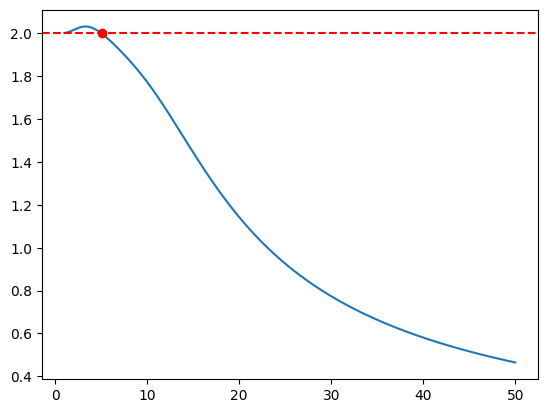

In [10]:
import numpy as np
from sympy import Symbol, ln, simplify, exp, diff, cosh, sinh, Function, lambdify, Interval, minimum,N, solve, limit
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root
from shapely.geometry import LineString

#Spacetime Dimension
d = 4

a_sig108 = Symbol(r'\alpha_{sig108}')
w_sig108 = expr.subs(al,a_sig108)
v = Symbol('v')
x = Symbol('x')
beta = Symbol(r'\beta')

v_sig108 = diff(w_sig108,a_sig108)

a = np.linspace(1,50,1000)
a_new = np.linspace(-100,100,1000)

print_v_sig108 = lambdify(a_sig108,v_sig108)

#plt.plot(a,print_v_BT(a))
#plt.show()

E_p = 1 - v**4 + (1 - v**2)*(2/(d-2))

DE_p = diff(E_p,v)

F_sig108 = E_p.subs(v,v_sig108) - (2/(beta*(d-2)))*(w_sig108-v_sig108*a_sig108)

beta_sig108 = -(2/(d-2))*(a_sig108/DE_p.subs(v,v_sig108))

print_beta_sig108 = lambdify(a_sig108,beta_sig108)

#print(a_BT,'=',find_min(x=a,y=print_beta_BT(a)))
#print(beta,'=',print_beta_BT(find_min(x=a,y=print_beta_BT(a)))*2)
print_F_sig108 = lambdify(a_sig108,F_sig108.subs(beta,beta_sig108))
#F_sig108_trivial = F_sig108.subs(a_sig108,0).subs(beta,beta_sig108)
F_sig108_trivial = E_p.subs(v,0)



#print_F_BT_trivial2 = lambdify(a_BT,F_BT_trivial2)
#plt.plot(a,print_F_BT_trivial2(a),color='r')

#plt.plot(a,print_F_BT_trivial(a))
plt.plot(a,print_F_sig108(a))
trivials_F_sig108 = np.ones(len(a))*F_sig108_trivial
plt.axhline(y=F_sig108_trivial, color='r', linestyle='--')
#plt.axhline(y=N(lim_F_sig108), color='r', linestyle='--')
#plt.show()
line_1 = LineString(np.column_stack((a,np.real(print_F_sig108(a)))))
line_2 = LineString(np.column_stack((a,np.real(trivials_F_sig108))))
intersection = line_1.intersection(line_2)
plt.plot(*intersection.xy,'ro')
a_sig108_c = intersection.xy[0][0]

#print(find_root(a,trivials_F_BT,print_F_BT(a),trivial=0))
beta_sig108_c = print_beta_sig108(a_sig108_c)
v_sig108_c = print_v_sig108(a_sig108_c)
print(sp.re(beta_sig108_c))

In [ ]:
%pip install shapely --break-system-packages

In [30]:
F_sig108_trivial

-(-43*\alpha_{sig108}**4/186624 - 7*\alpha_{sig108}**3/62208 + \alpha_{sig108}**2/432 + 7*\alpha_{sig108}/144 + 1/12 + 1/\alpha_{sig108})**4 - 2.0*(-43*\alpha_{sig108}**4/186624 - 7*\alpha_{sig108}**3/62208 + \alpha_{sig108}**2/432 + 7*\alpha_{sig108}/144 + 1/12 + 1/\alpha_{sig108})**2 + 3.0 + 1.0*(0.000921639231824417*\alpha_{sig108}**4 + 0.000450102880658436*\alpha_{sig108}**3 - 0.00925925925925926*\alpha_{sig108}**2 - 0.194444444444444*\alpha_{sig108} - 4*(-43*\alpha_{sig108}**4/186624 - 7*\alpha_{sig108}**3/62208 + \alpha_{sig108}**2/432 + 7*\alpha_{sig108}/144 + 1/12 + 1/\alpha_{sig108})**3 - 0.333333333333333 - 4.0/\alpha_{sig108})*(-43*\alpha_{sig108}**5/933120 - 7*\alpha_{sig108}**4/248832 + \alpha_{sig108}**3/1296 + 7*\alpha_{sig108}**2/288 - \alpha_{sig108}*(-43*\alpha_{sig108}**4/186624 - 7*\alpha_{sig108}**3/62208 + \alpha_{sig108}**2/432 + 7*\alpha_{sig108}/144 + 1/12 + 1/\alpha_{sig108}) + \alpha_{sig108}/12 + log(\alpha_{sig108}) - log(6))/\alpha_{sig108}

In [45]:
MFT = [2.34032253849439,2.68705411618357,3.23792741743008]
Monte = [2.523,3.21, 3.432]

Text(0.5, 1.0, 'SU(3) discrete subgroup result summary')

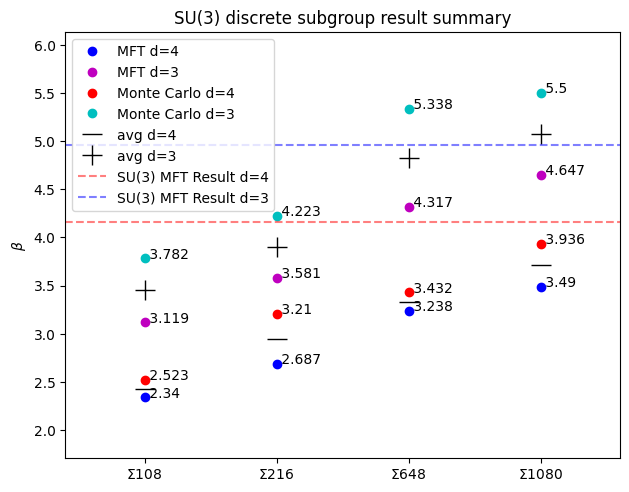

In [8]:
x = np.array([1,2,3,4])
l = [r'$\Sigma108$',r'$\Sigma216$',r'$\Sigma648$',r'$\Sigma1080$']
MFT = np.array([2.34032253849439,2.68705411618357,3.23792741743008,3.48993412921840])
MFT_2 = np.array([3.11871689505636, 3.58093263079067,4.31717530796756,4.64652023121072])
Monte = np.array([2.523,3.21, 3.432,3.9355])
Monte2 = np.array([3.782, 4.223, 5.338, 5.5])
su3_mft = 4.15918068384223
su3_mft2 = 4.95543249054894

d = (np.array(MFT) + np.array(Monte)) / 2

d2 = (np.array(MFT_2) + np.array(Monte2)) / 2

plt.subplot(111)
plt.margins(0.2)
plt.xticks(x,l)
plt.plot(x, MFT, 'bo', label='MFT d=4')
plt.plot(x, MFT_2, 'mo', label='MFT d=3')
plt.plot(x, Monte, 'ro', label='Monte Carlo d=4')
plt.plot(x, Monte2, 'co', label='Monte Carlo d=3')
plt.plot(x, d, 'k_', markersize=15, label='avg d=4')
plt.plot(x, d2, 'k+', markersize=15, label='avg d=3')
for i,j in enumerate(MFT,1):
    plt.text(i,j," "+str(round(j,3))) 
for i,j in enumerate(MFT_2,1):
    plt.text(i,j," "+str(round(j,3)))
for i,j in enumerate(Monte2,1):
    plt.text(i,j," "+str(round(j,3))) 
for i,j in enumerate(Monte,1):
    plt.text(i,j," "+str(round(j,3))) 

plt.axhline(y=su3_mft, color='r', linestyle='--', label = 'SU(3) MFT Result d=4', alpha=0.5)
plt.axhline(y=su3_mft2, color='b', linestyle='--', label = 'SU(3) MFT Result d=3', alpha=0.5)
plt.legend()
plt.ylabel(r'$\beta$')
plt.tight_layout()
plt.title('SU(3) discrete subgroup result summary')

#plot su(2)

In [260]:
import sympy as sp
from sympy import symbols, Matrix, cos, sin, exp, I

a,b,c,d,e,f,g,h = sp.symbols('a b c d e f g h')

# Define the 3x3 Gell-Mann matrices
lambda1 = sp.Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
lambda2 = sp.Matrix([[0, -sp.I, 0], [sp.I, 0, 0], [0, 0, 0]])
lambda3 = sp.Matrix([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
lambda4 = sp.Matrix([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
lambda5 = sp.Matrix([[0, 0,-sp.I], [0, 0, 0], [sp.I, 0, 0]])
lambda6 = sp.Matrix([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
lambda7 = sp.Matrix([[0, 0, 0], [0, 0, -sp.I], [0, sp.I, 0]])
lambda8 = 1/sp.sqrt(3)*sp.Matrix([[1, 0, 0], [0, 1, 0], [0, 0, -2]])


gellmann_matrices = [lambda1, lambda2, lambda3, lambda4, lambda5, lambda6, lambda7, lambda8]
params = [a,b,c,d,e,f,g]

uexp = sp.Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

for i,j in zip(gellmann_matrices, params):
    uexp = uexp + i*j
    
#sp.simplify(uexp)

sp.simplify(sp.simplify(sp.exp(sp.I*lambda1*a))*sp.simplify(sp.exp(-sp.I*lambda2*b)))

Matrix([
[I*sin(a)*sin(b) + cos(a)*cos(b),  I*sin(a)*cos(b) - sin(b)*cos(a), 0],
[I*sin(a)*cos(b) + sin(b)*cos(a), -I*sin(a)*sin(b) + cos(a)*cos(b), 0],
[                              0,                                0, 1]])

In [252]:
sigma1 = sp.Matrix([[0,1],[1,0]])
sigma2 = sp.Matrix([[0,-sp.I],[sp.I,0]])
sigma3 = sp.Matrix([[1,0],[0,-1]])

sp.simplify(sp.exp(sp.I*(sigma1*a)))*sp.simplify(sp.exp(sp.I*(sigma2*b)))*sp.simplify(sp.exp(sp.I*(sigma3*c)))

Matrix([
[(-I*sin(a)*sin(b) + cos(a)*cos(b))*exp(I*c), (I*sin(a)*cos(b) + sin(b)*cos(a))*exp(-I*c)],
[ (I*sin(a)*cos(b) - sin(b)*cos(a))*exp(I*c), (I*sin(a)*sin(b) + cos(a)*cos(b))*exp(-I*c)]])

In [264]:
U = Matrix([[cos(a)*cos(b)*exp(I*d),sin(a)*exp(I*f),cos(a)*sin(b)*exp(I*g)],
            [sin(b)*sin(c)*exp(-I*(g+h))-sin(a)*cos(b)*cos(c)*exp(I*(d+e-f)),cos(a)*cos(c)*exp(I*e),-cos(b)*sin(c)*exp(-I*(d+h))-sin(a)*sin(b)*cos(c)*exp(I*(e-f+g))],
            [-sin(a)*cos(b)*sin(c)*exp(I*(d-f+g))-sin(b)*cos(c)*exp(-I*(e+f)),cos(a)*sin(c)*exp(I*h),cos(b)*cos(c)*exp(-I*(d+e))-sin(a)*sin(b)*sin(c)*exp(I*(-f+g+h))]])

In [274]:
exprU = sin(a)*(cos(a)**3)*sin(b)*cos(b)*sin(c)*cos(c)*exp(al* sp.det(U)/3)

exprU

exp(\alpha*(exp(I*d)*exp(I*e)*exp(-I*d - I*e)*cos(a)**2*cos(b)**2*cos(c)**2 - exp(I*d)*exp(I*e)*exp(-I*f + I*g + I*h)*sin(a)*sin(b)*sin(c)*cos(a)**2*cos(b)*cos(c) + exp(I*d)*exp(I*h)*exp(-I*d - I*h)*sin(c)**2*cos(a)**2*cos(b)**2 + exp(I*d)*exp(I*h)*exp(I*e - I*f + I*g)*sin(a)*sin(b)*sin(c)*cos(a)**2*cos(b)*cos(c) + exp(I*e)*exp(I*g)*exp(-I*e - I*f)*sin(b)**2*cos(a)**2*cos(c)**2 + exp(I*e)*exp(I*g)*exp(I*d - I*f + I*g)*sin(a)*sin(b)*sin(c)*cos(a)**2*cos(b)*cos(c) - exp(I*f)*exp(-I*d - I*e)*exp(-I*g - I*h)*sin(a)*sin(b)*sin(c)*cos(b)*cos(c) + exp(I*f)*exp(-I*d - I*e)*exp(I*d + I*e - I*f)*sin(a)**2*cos(b)**2*cos(c)**2 + exp(I*f)*exp(-I*d - I*h)*exp(-I*e - I*f)*sin(a)*sin(b)*sin(c)*cos(b)*cos(c) + exp(I*f)*exp(-I*d - I*h)*exp(I*d - I*f + I*g)*sin(a)**2*sin(c)**2*cos(b)**2 + exp(I*f)*exp(-I*e - I*f)*exp(I*e - I*f + I*g)*sin(a)**2*sin(b)**2*cos(c)**2 + exp(I*f)*exp(-I*g - I*h)*exp(-I*f + I*g + I*h)*sin(a)**2*sin(b)**2*sin(c)**2 - exp(I*f)*exp(I*d + I*e - I*f)*exp(-I*f + I*g + I*h)*sin(a)**3*

In [273]:
sp.integrate(exprU,(a,0,sp.pi/2))


KeyboardInterrupt



Text(0.5, 1.0, 'SU(2) discrete subgroup result summary')

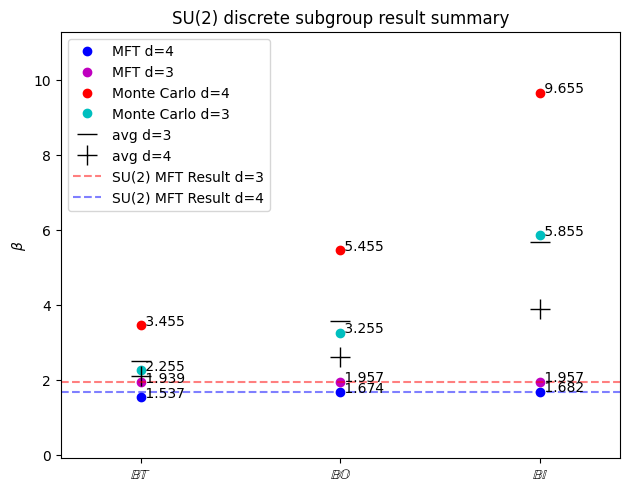

In [18]:
x = np.array([1,2,3])
l = [r'$\mathbb{BT}$',r'$\mathbb{BO}$',r'$\mathbb{BI}$']
MFT = np.array([1.5374,1.6738,1.6817])
MFT_2 = np.array([1.9394, 1.9566,1.9569])
Monte = np.array([3.455,5.455, 9.655])
Monte2 = np.array([2.255, 3.255, 5.855])
su2_mft_4 = 1.6817
su2_mft_3 = 1.9569


d = (np.array(MFT) + np.array(Monte)) / 2

d2 = (np.array(MFT_2) + np.array(Monte2)) / 2

plt.subplot(111)
plt.margins(0.2)
plt.xticks(x,l)
plt.plot(x, MFT, 'bo', label='MFT d=4')
plt.plot(x, MFT_2, 'mo', label='MFT d=3')
plt.plot(x, Monte, 'ro', label='Monte Carlo d=4')
plt.plot(x, Monte2, 'co', label='Monte Carlo d=3')
plt.plot(x, d, 'k_', markersize=15, label='avg d=3')
plt.plot(x, d2, 'k+', markersize=15, label='avg d=4')
for i,j in enumerate(MFT,1):
    plt.text(i,j," "+str(round(j,3))) 
for i,j in enumerate(MFT_2,1):
    plt.text(i,j," "+str(round(j,3)))
for i,j in enumerate(Monte2,1):
    plt.text(i,j," "+str(round(j,3))) 
for i,j in enumerate(Monte,1):
    plt.text(i,j," "+str(round(j,3))) 
    
plt.axhline(y=su2_mft_3, color='r', linestyle='--', label = 'SU(2) MFT Result d=3',alpha=0.5)
plt.axhline(y=su2_mft_4, color='b', linestyle='--', label = 'SU(2) MFT Result d=4',alpha=0.5)
plt.legend()
plt.ylabel(r'$\beta$')
plt.tight_layout()
plt.title('SU(2) discrete subgroup result summary')

#plot su(2)

/tmp/ipykernel_254706/3158507463.py:19: RuntimeWarning: invalid value encountered in divide
  factor += np.exp(-3j*(k+l)*t/2)*(np.sin((k-l+1)*phi/2))/np.sin(phi/2)


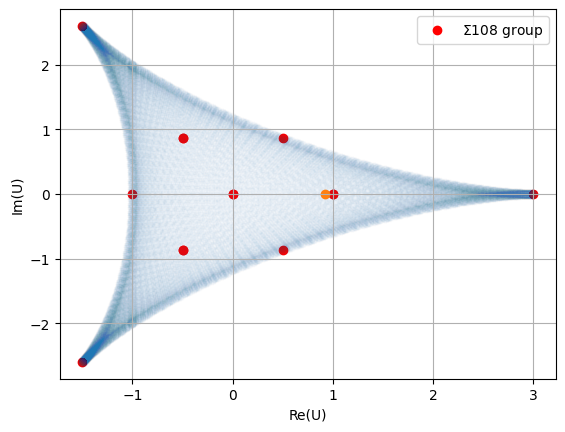

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
#from scipy.signal import hilbert, chirp

s_reals = []
s_img = []
s_points =[]
for i in Sigma_F:
    s_reals.append(float(sp.N(sp.re(i))))
    s_img.append(float(sp.N(sp.im(i))))
    s_points.append([float(sp.N(sp.re(i))),float(sp.N(sp.im(i)))])

def su3_char(p,q,t,phi):
    factor = 0
    phase=np.exp(1j*(p+2*q)*t)
    for k in range(q,p+q+1):
        for l in range(0,q+1):
            factor += np.exp(-3j*(k+l)*t/2)*(np.sin((k-l+1)*phi/2))/np.sin(phi/2)
            
    return phase*factor
phis = np.linspace(0,2*np.pi,100)
ts = np.linspace(-np.pi,np.pi,100)
#ts = np.zeros(100)
xv, yv = np.meshgrid(phis, ts, indexing='ij')

def clean_up(array):
    nan_mask = np.isnan(array)
    new_array = array[~nan_mask]
    
    return new_array

def pnts(array):
    array_new = []
    for i in array:
        array_new.append(np.array([np.real(i),np.imag(i)]))
    return np.array(array_new)

test = clean_up(su3_char(1,0,yv,xv))
points = pnts(test)
#print(points)
hull = ConvexHull(points)
su3_reals = np.real(test)
su3_img = np.imag(test)
plt.scatter(s_reals,s_img,color='r',label=r'$\Sigma 108$ group')
plt.scatter(su3_reals,su3_img,alpha=0.01)
plt.scatter(v_sig108_c,0)
plt.ylabel('Im(U)')
plt.xlabel('Re(U)')
plt.grid()

plt.legend()

#Make 4 separate plots of each group, append to overleaf with notes, center plot, plot SU(2) subgroups
#Write full derivation of paper
#Clarify stuff with mu order param
#Write intro/abstract (use notes as guide)

/tmp/ipykernel_330350/1801027690.py:17: RuntimeWarning: invalid value encountered in divide
  return np.sin((j+1/2)*phi)/(np.sin(phi/2))


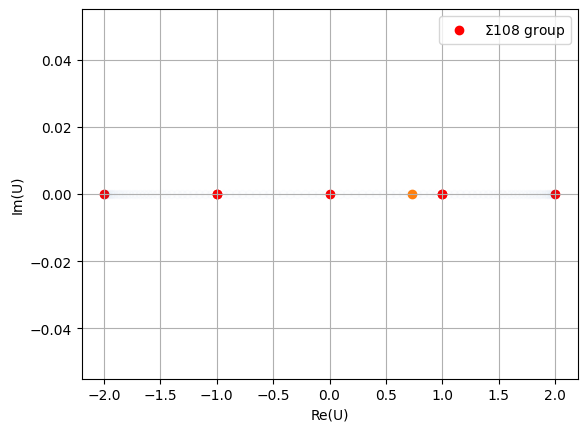

In [11]:
#####SU(2)

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
#from scipy.signal import hilbert, chirp

s_reals = []
s_img = []
s_points =[]
for i in H_BT:
    s_reals.append(float(sp.N(sp.re(i))))
    s_img.append(float(sp.N(sp.im(i))))
    s_points.append([float(sp.N(sp.re(i))),float(sp.N(sp.im(i)))])

def su2_char(j,phi):
    return np.sin((j+1/2)*phi)/(np.sin(phi/2))
            
    return phase*factor
phis = np.linspace(0,2*np.pi,100)
#ts = np.linspace(-np.pi,np.pi,100)
#ts = np.zeros(100)
#xv, yv = np.meshgrid(phis, ts, indexing='ij')

def clean_up(array):
    nan_mask = np.isnan(array)
    new_array = array[~nan_mask]
    
    return new_array

def pnts(array):
    array_new = []
    for i in array:
        array_new.append(np.array([np.real(i),np.imag(i)]))
    return np.array(array_new)

test = clean_up(su2_char(1/2,phis))
points = pnts(test)
#print(points)
#hull = ConvexHull(points)
su3_reals = np.real(test)
su3_img = np.imag(test)
plt.scatter(s_reals,s_img,color='r',label=r'$\Sigma 108$ group')
plt.scatter(su3_reals,su3_img,alpha=0.01)
plt.scatter(v_sig108_c,0)
plt.ylabel('Im(U)')
plt.xlabel('Re(U)')
plt.grid()

plt.legend()

0.0
(0.9976948316849403+0j)


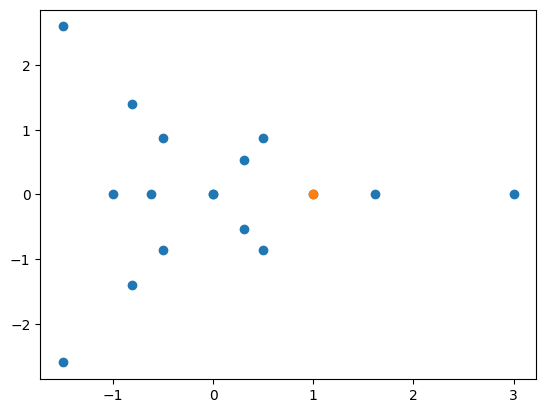

In [12]:
su3_complex = np.array(s_reals) + 1j*np.array(s_img)

su3_centered = su3_complex+0*v_sig108_c

def clean_up(array):
    nan_mask = np.isnan(array)
    new_array = array[~nan_mask]
    
    return new_array


su3_clean = np.abs(clean_up(su3_centered))

print(np.min(su3_clean))

plt.scatter(np.real(su3_centered),np.imag(su3_centered))
plt.scatter(v_sig108_c,0)
print(v_sig108_c)
#su3_clean_mg 
            

array([[0.95835438, 0.82546309],
       [0.15917917, 0.61108844],
       [0.17237564, 0.69089801],
       [0.88135382, 0.18127283],
       [0.69284828, 0.02653633],
       [0.00760568, 0.84517633],
       [0.81096234, 0.9785864 ],
       [0.57502807, 0.94330531],
       [0.45302932, 0.84919429],
       [0.24543727, 0.31234366],
       [0.94034654, 0.71289319],
       [0.73966879, 0.46755478],
       [0.20671578, 0.71984029],
       [0.40692145, 0.13592382],
       [0.9637196 , 0.40904693],
       [0.93264167, 0.05005091],
       [0.85981356, 0.64538182],
       [0.15111312, 0.85694494],
       [0.13425765, 0.92402389],
       [0.84035049, 0.86401016],
       [0.20743874, 0.55319347],
       [0.0674247 , 0.04008878],
       [0.67443044, 0.47454556],
       [0.48456743, 0.80877792],
       [0.17134311, 0.88997513],
       [0.42173799, 0.31241918],
       [0.69272392, 0.02535753],
       [0.48290113, 0.46886404],
       [0.01426319, 0.14742885],
       [0.62470923, 0.94509075]])

In [12]:
str(np.random.randint(1, 11, size=10) )

'[3 3 1 1 8 6 8 3 5 4]'